## Optimisation

In [18]:
# Optimization
import scipy.optimize as so

# Numerical Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

In [19]:
# Fix x values
x = np.arange(0.0, 21.0, 1.0)

# Fix y values
y = 5.0 * x + 10.0 + np.random.normal(0.0, 5.0, x.size)

# Print the values
x, y

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 array([  7.24455167,  20.6339928 ,  17.39294246,  23.56179762,
         26.60331285,  37.05429674,  36.04871874,  38.01449661,
         44.41440875,  58.56988362,  56.50266215,  64.43173514,
         73.1414845 ,  75.39071267,  76.00779625,  86.73887795,
         94.32014904,  90.75324546,  93.10294448, 106.51030763,
        107.19486079]))

In [20]:
# Use minimize functuion in scipy.minimize
# First we need a function to minimize
#

# Here is the cost function
# Must take a SINGLE argument - but our cost function takes two(m and c)
# Put in arrey called MC to get around this
def cost(MC):
    # Unpack valuses for MC
    m, c = MC
    # Data points for the function
    cost = np.sum(( y- m * x - c)**2)
    return cost

In [21]:
# Run a test
cost((5.0, 10.0))

308.265031364088

In [30]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
result = so.minimize(cost, (3,3))

# show the results
result

      fun: 274.98552348356327
 hess_inv: array([[ 0.00064935, -0.00649351],
       [-0.00649351,  0.08874461]])
      jac: array([3.81469727e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([4.98495446, 8.89489243])

In [31]:
m_o, c_o = result.x

m_o, c_o

(4.9849544633216185, 8.894892429689694)

In [34]:
# analyical result
m_a, c_a = np.polyfit(x, y, 1)
m_a, c_a

(4.9849544936555965, 8.894892107000969)

<function matplotlib.pyplot.show(close=None, block=None)>

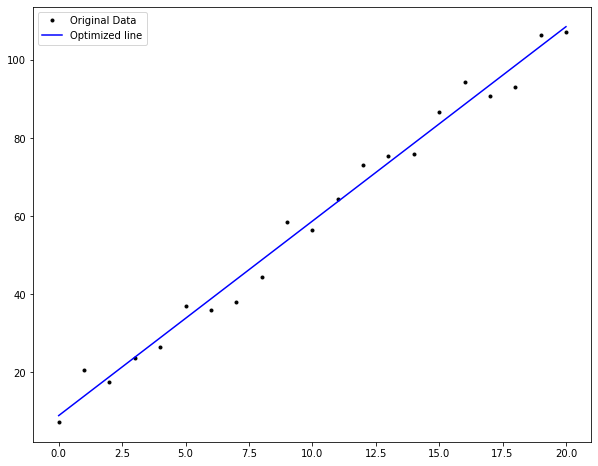

In [35]:
# Plot to best fit line from the optimization

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y, 'k.', label = "Original Data")
ax.plot(x, m_o * x + c_o,'b-', label = 'Optimized line')
#ax.plot(x, m_a * x + c_a,'r-', label = 'Analytical line')
ax.legend()

#show plot
plt.show

### Curve Fitting

***

In [52]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Curve_Fit
# Create the model function

def fun(x, m, c):
    return m * x + c


In [53]:
# Run curve_fit
result = so.curve_fit(fun, x, y)

In [54]:
#show result
result

(array([4.98495449, 8.89489211]),
 array([[ 0.018796  , -0.18796003],
        [-0.18796003,  2.56878703]]))

In [55]:
# Pull out Parameters
m_f, c_f = result[0]

# See values
m_f, c_f 

(4.984954493919226, 8.894892112033492)

<function matplotlib.pyplot.show(close=None, block=None)>

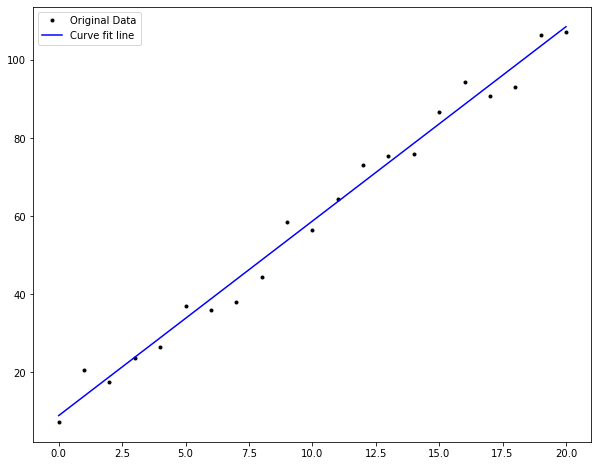

In [56]:
# Plot to best fit line from the optimization

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y, 'k.', label = "Original Data")
ax.plot(x, m_f * x + c_f,'b-', label = 'Curve fit line')
#ax.plot(x, m_a * x + c_a,'r-', label = 'Analytical line')
ax.legend()

#show plot
plt.show

### Parameters

***

In [68]:
# Generate a range of values
x = np.linspace(0.0, 10.0, 50)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [73]:
# Range of y values based on x
                    #this adds in the "noise"
y = 4.0 * x - 2.0 + np.random.normal(0.0, 1.0, len(x))
y

array([-1.55014998,  0.21290184,  0.2398    , -0.20038038, -0.38108531,
        3.44795157,  0.8782378 ,  2.32179943,  5.18095419,  3.27690422,
        6.79826486,  6.24200695,  7.38137098,  8.44302648, 10.03525601,
       10.09659536, 13.03850618, 10.63064482, 13.65502618, 13.33837309,
       13.38303847, 17.13954091, 16.14899677, 15.99533583, 18.22499924,
       19.11972964, 19.56249379, 18.85001844, 22.00015589, 21.8399402 ,
       22.17073149, 24.70689801, 23.89013533, 25.11827974, 25.48815262,
       25.81508853, 28.16799374, 29.54366508, 30.21302676, 30.54555983,
       31.20697084, 31.53380454, 32.09919264, 35.26972925, 32.41051914,
       33.24616922, 34.83836906, 35.76915205, 37.1513685 , 38.49984501])

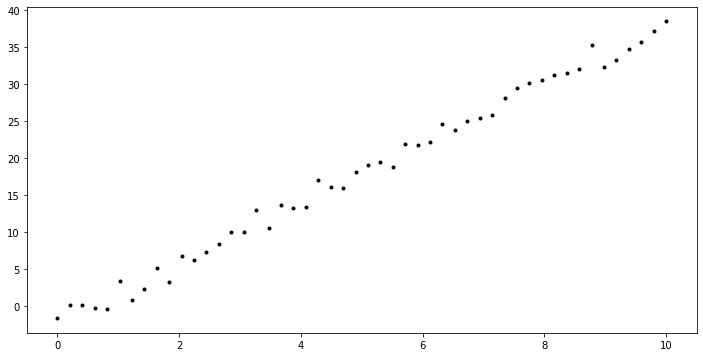

In [74]:
# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

In [76]:
# use x and y to find original parameters used to create data
params = np.polyfit(x, y, 1)
params

array([ 4.02593545, -2.06897917])

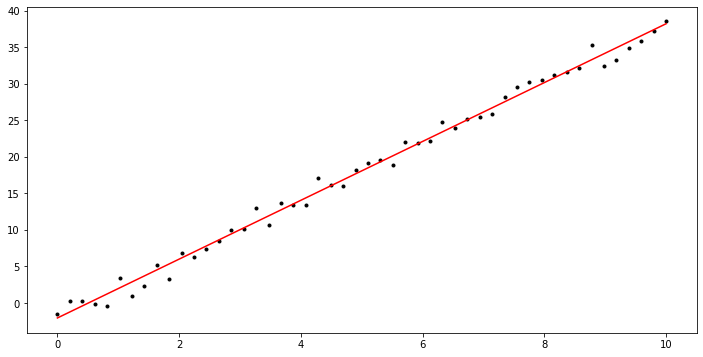

In [78]:
# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

# PLot x and params on x
ax.plot(x, params[0] * x + params[1], 'r-')


In [84]:
# use x and y to find original parameters used to create data
params = np.polyfit(x, y, 2)
params

array([-0.01659074,  4.19184284, -2.33984838])

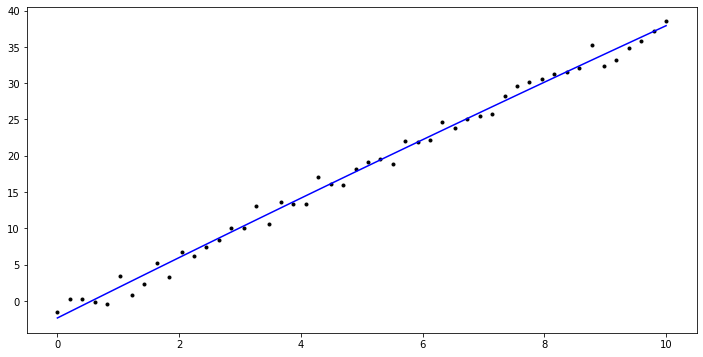

In [85]:
# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

# PLot x and params on x
ax.plot(x, params[0] * x**2 + params[1]* x + params[2], 'b-')